# Supervised Learning (II): Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. The Penguins Dataset

In [2]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


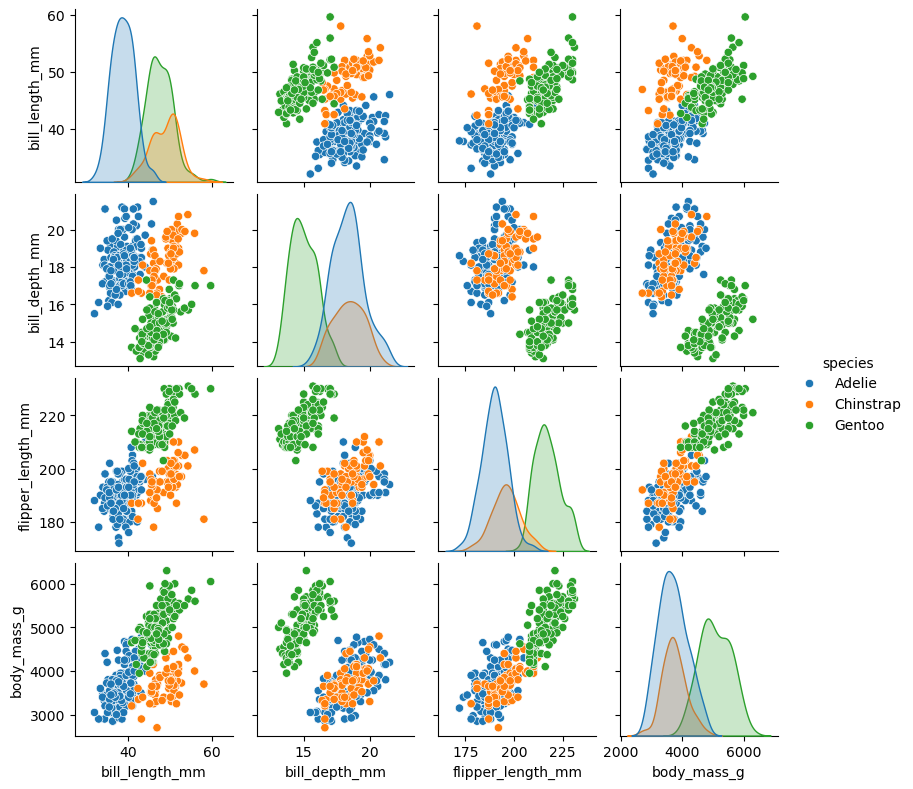

In [3]:
sns.pairplot(penguins[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]], hue="species", height=2.0)

## 2. Data Processing

In [4]:
# remove missing values
penguins_regression = penguins.dropna()

# check duplicate values from dataset
penguins_regression.duplicated().value_counts()

False    333
Name: count, dtype: int64

## 3. Data Processiing

### 3.1 Splitting features

In [5]:
X = penguins_regression[["flipper_length_mm"]].values
y = penguins_regression["body_mass_g"].values

### 3.2 Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
   
# standardize feature and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

### 3.3 Splitting training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=123)

X_train_orig = scaler_X.inverse_transform(X_train_scaled).ravel()
X_test_orig = scaler_X.inverse_transform(X_test_scaled).ravel()
y_train_orig = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

print(f"Number of examples for training is {len(X_train_scaled)} and test is {len(X_test_scaled)}")

Number of examples for training is 266 and test is 67


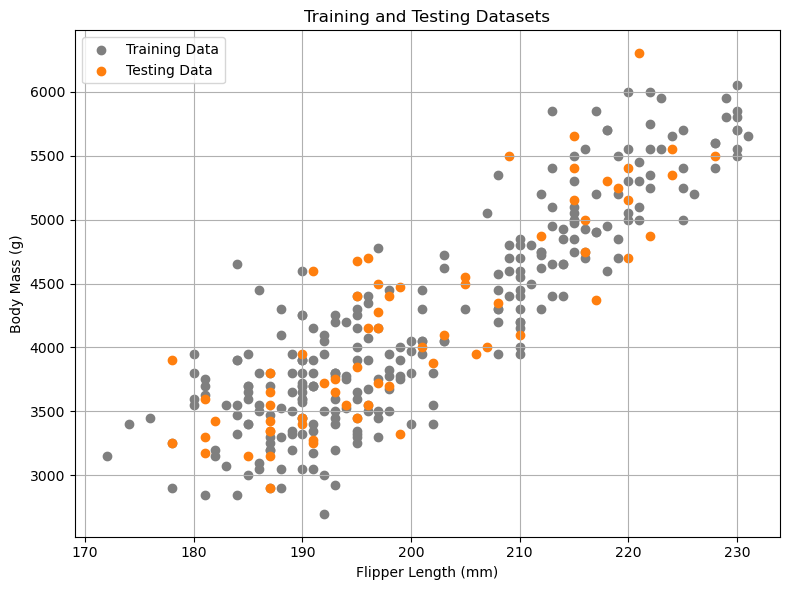

In [8]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Training and Testing Datasets")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Training Model & Evaluating Model Performance

### 4.1 k-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train_scaled)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# predict on test data
y_pred_knn_scaled = knn_model.predict(X_test_scaled)
y_pred_knn = scaler_y.inverse_transform(y_pred_knn_scaled.reshape(-1, 1)).ravel()

# evaluate model performance
from sklearn.metrics import root_mean_squared_error, r2_score

rmse_knn = root_mean_squared_error(y_test_orig, y_pred_knn)
r2_value_knn = r2_score(y_test_orig, y_pred_knn)
print(f"K-Nearest Neighbors RMSE: {rmse_knn:.2f}, R²: {r2_value_knn:.2f}")

K-Nearest Neighbors RMSE: 444.09, R²: 0.68


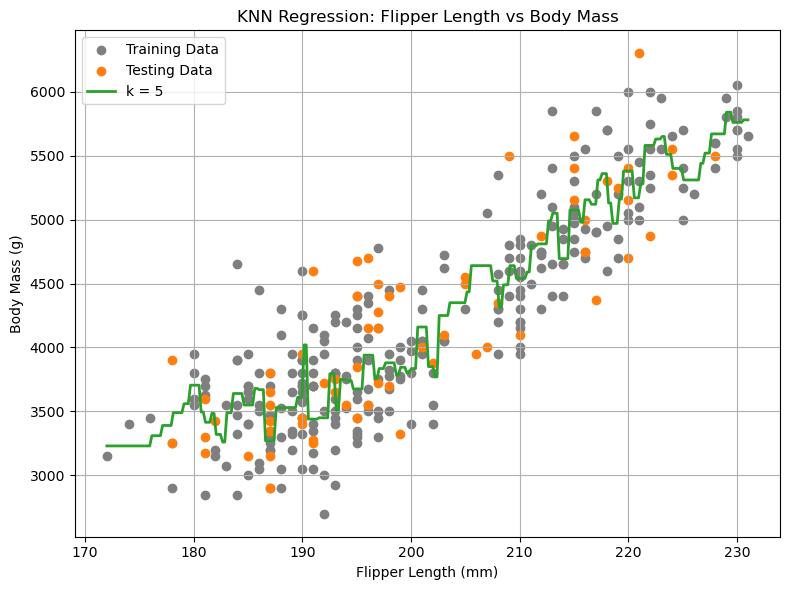

In [11]:
# using all predictions to plot the regression curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_scaled = scaler_X.transform(X_range)
y_range_scaled = knn_model.predict(X_range_scaled).flatten()
y_range = scaler_y.inverse_transform(y_range_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y=y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range, color='tab:green', label=f"k = {5}", linewidth=2)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("KNN Regression: Flipper Length vs Body Mass")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-knn-5.png")

### 4.2 Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)
print(linear_model.coef_, linear_model.intercept_)

y_pred_linear_scaled = linear_model.predict(X_test_scaled)
y_pred_linear = scaler_y.inverse_transform(y_pred_linear_scaled.reshape(-1, 1)).ravel()

rmse_linear = root_mean_squared_error(y_test_orig, y_pred_linear)
r2_value_linear = r2_score(y_test_orig, y_pred_linear)
print(f"Linear Regression RMSE: {rmse_linear:.2f}, R²: {r2_value_linear:.2f}")

[0.87318095] -0.0071370715694049885
Linear Regression RMSE: 411.85, R²: 0.72


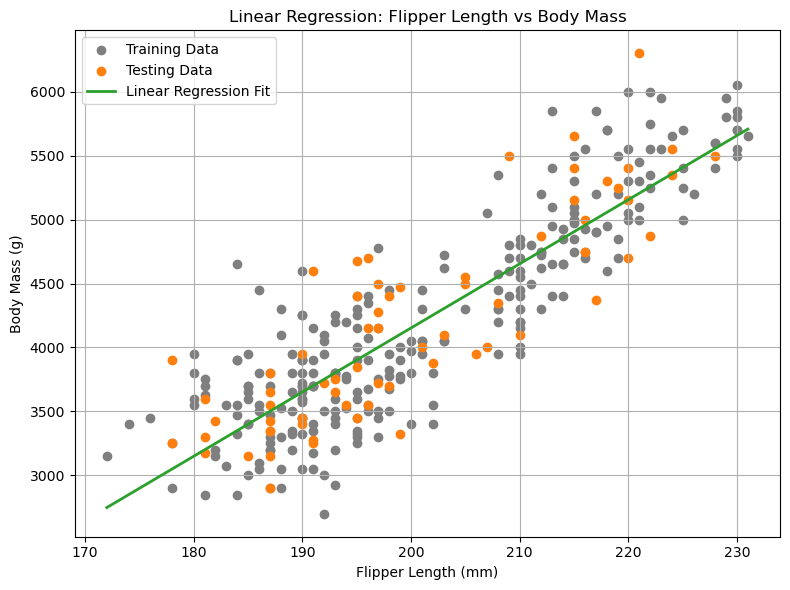

In [13]:
# using all predictions to plot regression curve

y_range_linear_scaled = linear_model.predict(X_range_scaled).flatten()
y_range_linear = scaler_y.inverse_transform(y_range_linear_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y=y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', label="Linear Regression Fit", linewidth=2)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear Regression: Flipper Length vs Body Mass")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear.png")

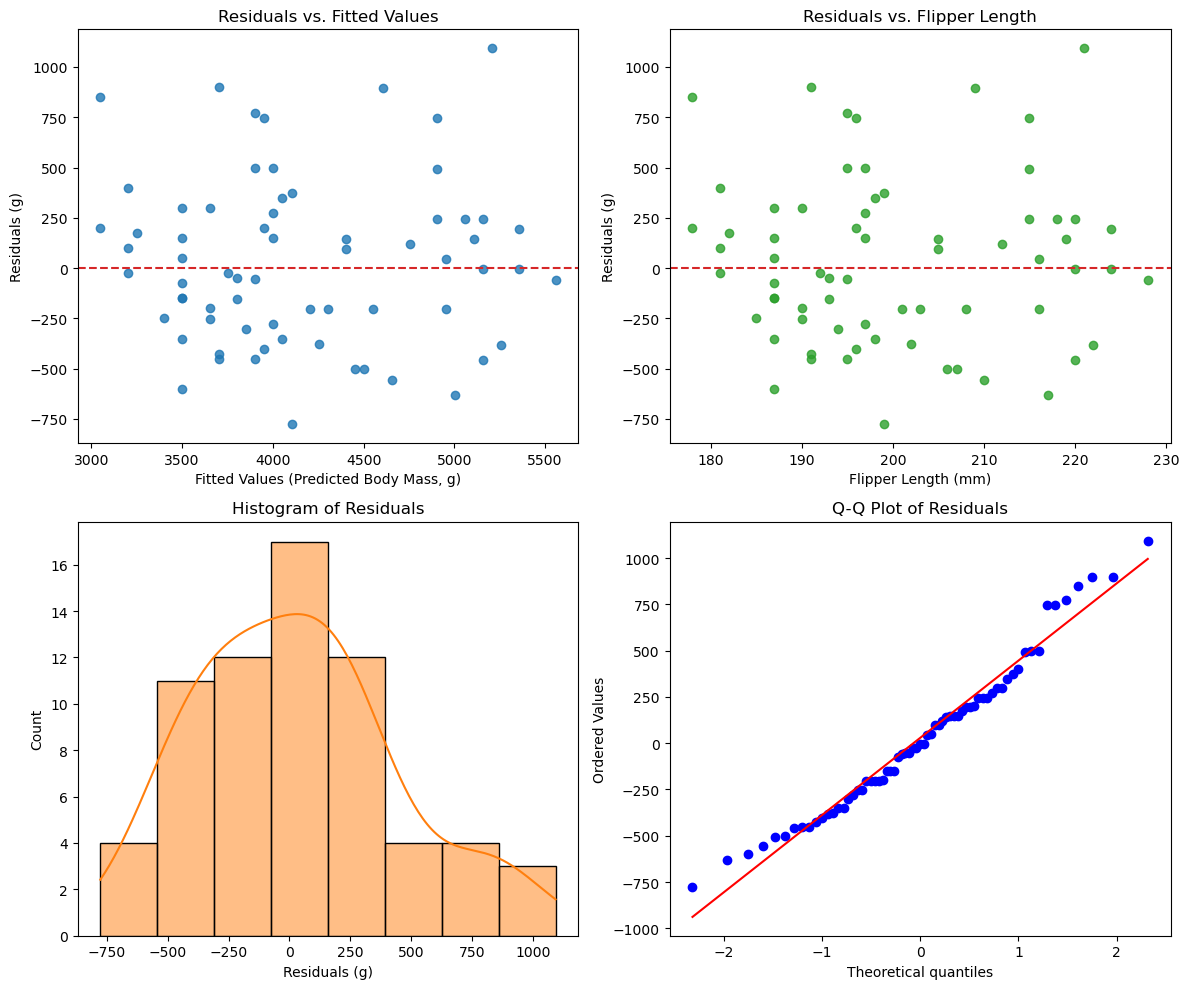

In [14]:
from scipy import stats

# calculate residuals
residuals = y_test_orig - y_pred_linear

# create a figure with subplots for residual analysis
plt.figure(figsize=(12, 10))

# residuals vs. fitted Values
plt.subplot(2, 2, 1)
plt.scatter(y_pred_linear, residuals, alpha=0.8, color='tab:blue')
plt.axhline(y=0, color='tab:red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Body Mass, g)')
plt.ylabel('Residuals (g)')
plt.title('Residuals vs. Fitted Values')

# residuals vs. flipper length
plt.subplot(2, 2, 2)
plt.scatter(X_test_orig, residuals, alpha=0.8, color='tab:green')
plt.axhline(y=0, color='tab:red', linestyle='--')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Residuals (g)')
plt.title('Residuals vs. Flipper Length')

# histogram of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, color='tab:orange')
plt.xlabel('Residuals (g)')
plt.title('Histogram of Residuals')

# the Q-Q plot for normality
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-linear-residual-analysis.png")

In [15]:
# training data
y_pred_train_scaled = linear_model.predict(X_train_scaled)
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()

rmse_linear_train = root_mean_squared_error(y_train_orig, y_pred_train)
r2_linear_train = r2_score(y_train_orig, y_pred_train)

print(f"Linear Regression (Train) RMSE: {rmse_linear_train:.2f}, R²: {r2_linear_train:.2f}")

# testing data
y_pred_test_scaled = linear_model.predict(X_test_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()

rmse_linear_test = root_mean_squared_error(y_test_orig, y_pred_test)
r2_linear_test = r2_score(y_test_orig, y_pred_test)

print(f"Linear Regression (Test)  RMSE: {rmse_linear_test:.2f}, R²: {r2_linear_test:.2f}")

Linear Regression (Train) RMSE: 387.10, R²: 0.77
Linear Regression (Test)  RMSE: 411.85, R²: 0.72


#### Regularized Regression (Ridge & Lasso)

To address overfitting and underfitting, regularized regression methods, such as **Ridge** and **Lasso** regression, extend linear regression by adding a penalty term to the standard cost function. This penalty discourages the model from relying too heavily on any single feature or from becoming overly complex by forcing coefficient values to be small.
- **Ridge Regression** (L2 regularization) shrinks coefficients towards zero but never entirely eliminates them, which is highly effective for handling correlated features and improving stability. This is common in the penguins dataset when predictors like flipper length and bill length are correlated. 
- **Lasso Regression** (L1 regularization) can drive some coefficients to exactly zero, effectively performing automatic feature selection and creating a simpler, more interpretable model. For instance, Lasso might retain flipper length while discarding less predictive features, improving generalization.

In [16]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train_scaled, y_train_scaled)
print(ridge_model.coef_, ridge_model.intercept_)

y_pred_ridge_scaled = ridge_model.predict(X_test_scaled)
y_pred_ridge = scaler_y.inverse_transform(y_pred_ridge_scaled.reshape(-1, 1)).ravel()

rmse_ridge = root_mean_squared_error(y_test_orig, y_pred_ridge)
r2_value_ridge = r2_score(y_test_orig, y_pred_ridge)
print(f"Regularized Regression (Ridge) RMSE: {rmse_ridge:.2f}, R²: {r2_value_ridge:.2f}")

[0.81361728] -0.006180447493939294
Regularized Regression (Ridge) RMSE: 414.18, R²: 0.72


In [17]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train_scaled, y_train_scaled)
print(lasso_model.coef_, lasso_model.intercept_)

y_pred_lasso_scaled = lasso_model.predict(X_test_scaled)
y_pred_lasso = scaler_y.inverse_transform(y_pred_lasso_scaled.reshape(-1, 1)).ravel()

rmse_lasso = root_mean_squared_error(y_test_orig, y_pred_lasso)
r2_value_lasso = r2_score(y_test_orig, y_pred_lasso)
print(f"Regularized Regression (Lasso) RMSE: {rmse_lasso:.2f}, R²: {r2_value_lasso:.2f}")

[0.67844643] -0.00400953222964082
Regularized Regression (Lasso) RMSE: 437.19, R²: 0.69


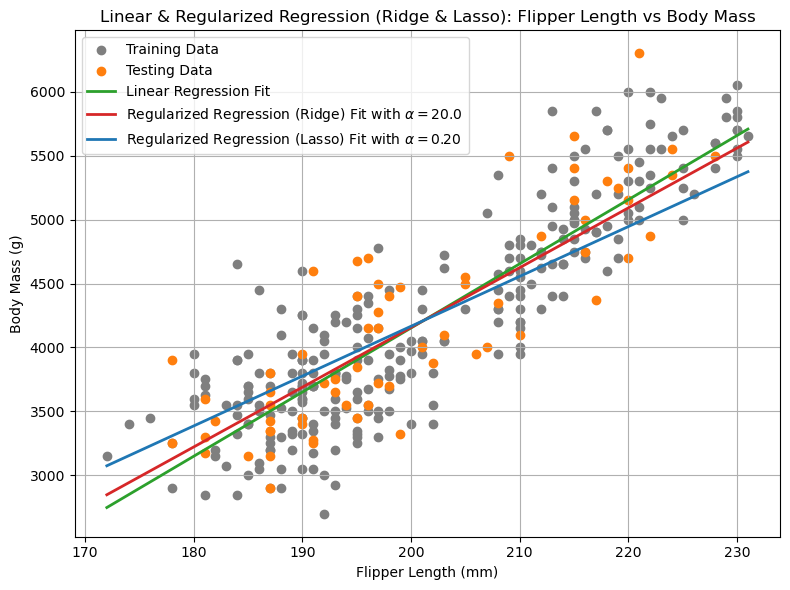

In [18]:
# using all predictions to plot regression curve

y_range_ridge_scaled = ridge_model.predict(X_range_scaled).flatten()
y_range_ridge = scaler_y.inverse_transform(y_range_ridge_scaled.reshape(-1, 1)).ravel()

y_range_lasso_scaled = lasso_model.predict(X_range_scaled).flatten()
y_range_lasso = scaler_y.inverse_transform(y_range_lasso_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))
plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_ridge, color='tab:red', linewidth=2, label=r"Regularized Regression (Ridge) Fit with $\alpha=20.0$")
plt.plot(X_range, y_range_lasso, color='tab:blue', linewidth=2, label=r"Regularized Regression (Lasso) Fit with $\alpha=0.20$")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear & Regularized Regression (Ridge & Lasso): Flipper Length vs Body Mass")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-ridge-lasso.png")

In [19]:
print("Comparison of fitting parameters:")
print(f"Linear      Regression         fitting parameters: slope = {linear_model.coef_[0]:.4f} and intercept = {linear_model.intercept_:.6f}")
print(f"Regularized Regression (Ridge) fitting parameters: slope = {ridge_model.coef_[0]:.4f} and intercept = {ridge_model.intercept_:.6f}")
print(f"Regularized Regression (Lasso) fitting parameters: slope = {lasso_model.coef_[0]:.4f} and intercept = {lasso_model.intercept_:.6f}")

print("\nComparison of RMSE and R² values:")
print(f"Linear      Regression         RMSE: {rmse_linear:.2f}, R²: {r2_value_linear:.2f}")
print(f"Regularized Regression (Ridge) RMSE: {rmse_ridge:.2f}, R²: {r2_value_ridge:.2f}")
print(f"Regularized Regression (Lasso) RMSE: {rmse_lasso:.2f}, R²: {r2_value_lasso:.2f}")

Comparison of fitting parameters:
Linear      Regression         fitting parameters: slope = 0.8732 and intercept = -0.007137
Regularized Regression (Ridge) fitting parameters: slope = 0.8136 and intercept = -0.006180
Regularized Regression (Lasso) fitting parameters: slope = 0.6784 and intercept = -0.004010

Comparison of RMSE and R² values:
Linear      Regression         RMSE: 411.85, R²: 0.72
Regularized Regression (Ridge) RMSE: 414.18, R²: 0.72
Regularized Regression (Lasso) RMSE: 437.19, R²: 0.69


### 4.3 Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree3=3
poly3_model = make_pipeline(PolynomialFeatures(degree3), LinearRegression())
poly3_model.fit(X_train_scaled, y_train_scaled)
print(poly3_model.named_steps['linearregression'].coef_, poly3_model.named_steps['linearregression'].intercept_)

y_pred_poly3_scaled = poly3_model.predict(X_test_scaled)
y_pred_poly3 = scaler_y.inverse_transform(y_pred_poly3_scaled.reshape(-1, 1)).ravel()

rmse_poly3 = root_mean_squared_error(y_test_orig, y_pred_poly3)
r2_value_poly3 = r2_score(y_test_orig, y_pred_poly3)
print(f"Polynomial Regression (degree={degree3}) RMSE: {rmse_poly3:.2f}, R²: {r2_value_poly3:.2f}")

[ 0.          0.94465524  0.17823342 -0.06719099] -0.16346920517391358
Polynomial Regression (degree=3) RMSE: 407.47, R²: 0.73


In [21]:
degree5=5
poly5_model = make_pipeline(PolynomialFeatures(degree5), LinearRegression())
poly5_model.fit(X_train_scaled, y_train_scaled)
print(poly5_model.named_steps['linearregression'].coef_, poly5_model.named_steps['linearregression'].intercept_)

y_pred_poly5_scaled = poly5_model.predict(X_test_scaled)
y_pred_poly5 = scaler_y.inverse_transform(y_pred_poly5_scaled.reshape(-1, 1)).ravel()

rmse_poly5 = root_mean_squared_error(y_test_orig, y_pred_poly5)
r2_value_poly5 = r2_score(y_test_orig, y_pred_poly5)
print(f"Polynomial Regression (degree={degree5}) RMSE: {rmse_poly5:.2f}, R²: {r2_value_poly5:.2f}")

[ 0.          0.92465516  0.36156078 -0.0626784  -0.05545389  0.00535874] -0.2431881874018734
Polynomial Regression (degree=5) RMSE: 415.55, R²: 0.72


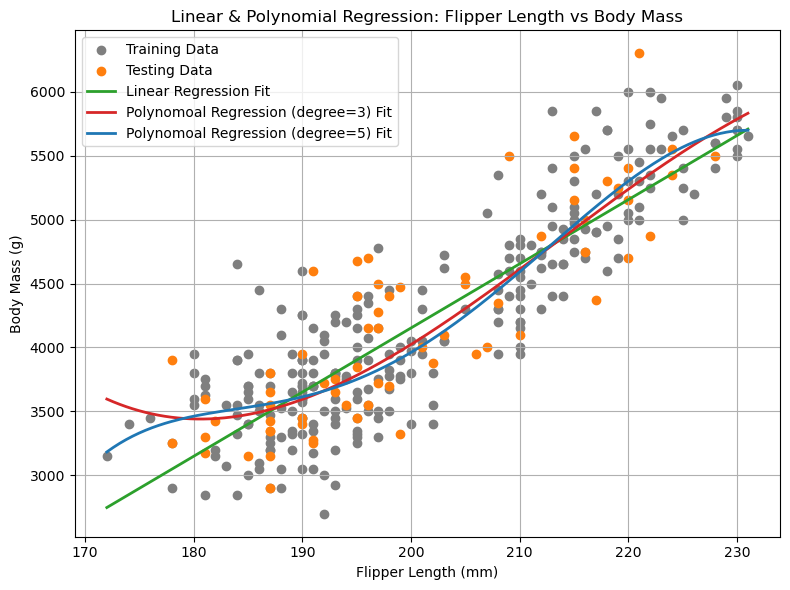

In [22]:
# using all predictions to plot regression curve

y_range_poly3_scaled = poly3_model.predict(X_range_scaled).flatten()
y_range_poly3 = scaler_y.inverse_transform(y_range_poly3_scaled.reshape(-1, 1)).ravel()

y_range_poly5_scaled = poly5_model.predict(X_range_scaled).flatten()
y_range_poly5 = scaler_y.inverse_transform(y_range_poly5_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_poly3, color='tab:red', linewidth=2, label=f"Polynomoal Regression (degree={degree3}) Fit")
plt.plot(X_range, y_range_poly5, color='tab:blue', linewidth=2, label=f"Polynomoal Regression (degree={degree5}) Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear & Polynomial Regression: Flipper Length vs Body Mass")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-poly35.png")

In [23]:
print("Comparison of fitting parameters:")
print(f"Linear     Regression            fitting parameters: intercept = {ridge_model.intercept_:.4f} and slope = {linear_model.coef_}")
print(f"Polynomial Regression (degree=3) fitting parameters: intercept = {poly3_model.named_steps['linearregression'].intercept_:.4f} and slope = {poly3_model.named_steps['linearregression'].coef_}")
print(f"Polynomial Regression (degree=5) fitting parameters: intercept = {poly5_model.named_steps['linearregression'].intercept_:.4f} and slope = {poly5_model.named_steps['linearregression'].coef_}")

print("\nComparison of RMSE and R² values:")
print(f"Linear     Regression            RMSE: {rmse_linear:.2f}, R²: {r2_value_linear:.2f}")
print(f"Polynomial Regression (degree={degree3}) RMSE: {rmse_poly3:.2f}, R²: {r2_value_poly3:.2f}")
print(f"Polynomial Regression (degree={degree5}) RMSE: {rmse_poly5:.2f}, R²: {r2_value_poly5:.2f}")

Comparison of fitting parameters:
Linear     Regression            fitting parameters: intercept = -0.0062 and slope = [0.87318095]
Polynomial Regression (degree=3) fitting parameters: intercept = -0.1635 and slope = [ 0.          0.94465524  0.17823342 -0.06719099]
Polynomial Regression (degree=5) fitting parameters: intercept = -0.2432 and slope = [ 0.          0.92465516  0.36156078 -0.0626784  -0.05545389  0.00535874]

Comparison of RMSE and R² values:
Linear     Regression            RMSE: 411.85, R²: 0.72
Polynomial Regression (degree=3) RMSE: 407.47, R²: 0.73
Polynomial Regression (degree=5) RMSE: 415.55, R²: 0.72


**Residual analysis**

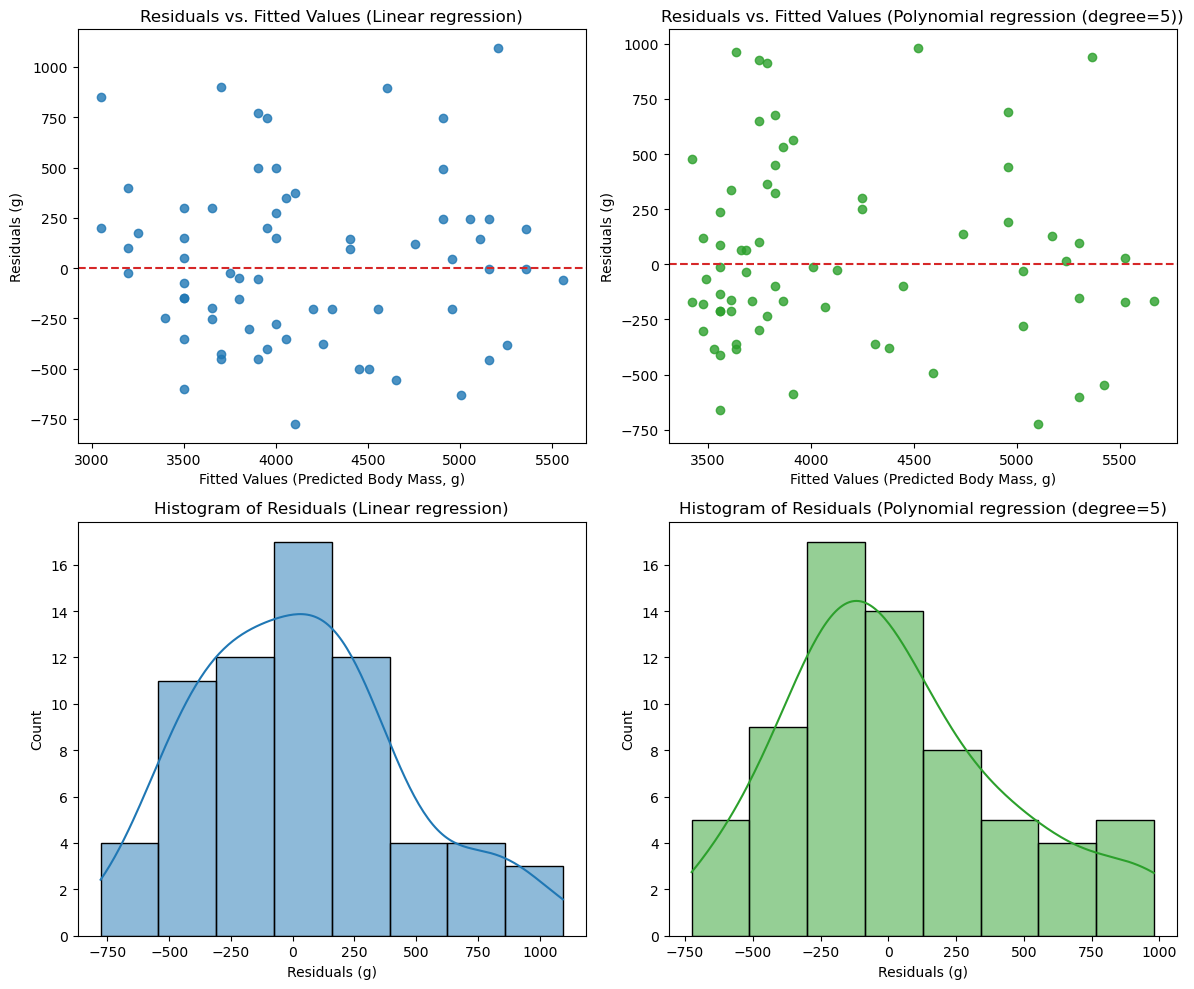

In [24]:
plt.figure(figsize=(12, 10))

# residuals vs. fitted values (linear)
residuals = y_test_orig - y_pred_linear
plt.subplot(2, 2, 1)
plt.scatter(y_pred_linear, residuals, alpha=0.8, color='tab:blue')
plt.axhline(y=0, color='tab:red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Body Mass, g)')
plt.ylabel('Residuals (g)')
plt.title('Residuals vs. Fitted Values (Linear regression)')

# residuals vs. fitted values (linear)
plt.subplot(2, 2, 2)
residuals = y_test_orig - y_pred_poly5
plt.scatter(y_pred_poly5, residuals, alpha=0.8, color='tab:green')
plt.axhline(y=0, color='tab:red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Body Mass, g)')
plt.ylabel('Residuals (g)')
plt.title('Residuals vs. Fitted Values (Polynomial regression (degree=5))')

# histogram of residuals (linear regression)
residuals = y_test_orig - y_pred_linear
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, color='tab:blue')
plt.xlabel('Residuals (g)')
plt.title('Histogram of Residuals (Linear regression)')

# histogram of residuals (polynomial regression)
plt.subplot(2, 2, 4)
residuals = y_test_orig - y_pred_poly5
sns.histplot(residuals, kde=True, color='tab:green')
plt.xlabel('Residuals (g)')
plt.title('Histogram of Residuals (Polynomial regression (degree=5)')

plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-linear-poly5-residual-analysis.png")

### 4.4 Support Vector Regression (SVR)

In [25]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', gamma=0.1, C=100.0, epsilon=1.0)
svr_model.fit(X_train_scaled, y_train_scaled)

y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

rmse_svr = root_mean_squared_error(y_test_orig, y_pred_svr)
r2_value_svr = r2_score(y_test_orig, y_pred_svr)
print(f"Support Vector Regression RMSE: {rmse_svr:.2f}, R²: {r2_value_svr:.2f}")

Support Vector Regression RMSE: 433.30, R²: 0.69


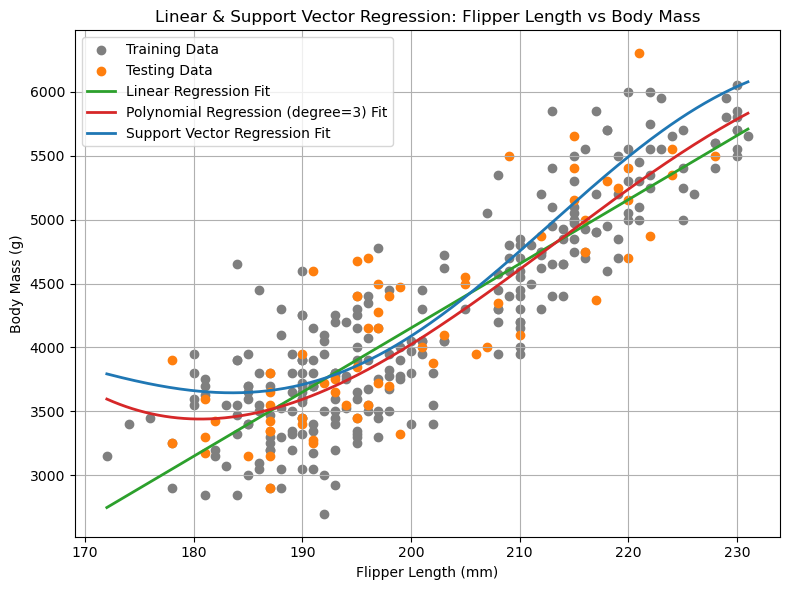

In [26]:
# using all predictions to plot regression curve

y_range_svr_scaled = svr_model.predict(X_range_scaled).flatten()
y_range_svr = scaler_y.inverse_transform(y_range_svr_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_poly3, color='tab:red', linewidth=2, label=f"Polynomial Regression (degree={degree3}) Fit")
plt.plot(X_range, y_range_svr, color='tab:blue', linewidth=2, label="Support Vector Regression Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear & Support Vector Regression: Flipper Length vs Body Mass")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-poly3-svr.png")

In [27]:
print("\nComparison of RMSE and R² values:")
print(f"Linear     Regression            RMSE: {rmse_linear:.2f}, R²: {r2_value_linear:.2f}")
print(f"Polynomial Regression (degree={degree3}) RMSE: {rmse_poly3:.2f}, R²: {r2_value_poly3:.2f}")
print(f"Support Vector Regression        RMSE: {rmse_svr:.2f}, R²: {r2_value_svr:.2f}")


Comparison of RMSE and R² values:
Linear     Regression            RMSE: 411.85, R²: 0.72
Polynomial Regression (degree=3) RMSE: 407.47, R²: 0.73
Support Vector Regression        RMSE: 433.30, R²: 0.69


**Grid search & Cross-validation**

In [28]:
from sklearn.model_selection import GridSearchCV

# define SVR model
svr_find_opt_model = SVR(kernel='rbf')

# define parameter grid
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1, 10],
    'epsilon': [0.1, 0.5, 1.0]
}

# set up 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    cv=5,  # 5-fold CV
    scoring='neg_root_mean_squared_error',  # RMSE
    verbose=2,
    n_jobs=-1
)

# fit the grid search to training data
grid_search.fit(X_train_scaled, y_train_scaled)

# best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 1000, 'epsilon': 0.1, 'gamma': 0.1}
Best CV RMSE: 0.4609639426572684


In [29]:
# train final model with best parameters

svr_opt_model = grid_search.best_estimator_
svr_opt_model.fit(X_train_scaled, y_train_scaled)

y_pred_svr_opt_scaled = svr_opt_model.predict(X_test_scaled)
y_pred_svr_opt = scaler_y.inverse_transform(y_pred_svr_opt_scaled.reshape(-1, 1)).ravel()

rmse_svr_opt = root_mean_squared_error(y_test_orig, y_pred_svr_opt)
r2_value_svr_opt = r2_score(y_test_orig, y_pred_svr_opt)
print(f"Support Vector Regression (OPT) RMSE: {rmse_svr_opt:.2f}, R²: {r2_value_svr_opt:.2f}")

print(f"Support Vector Regression       RMSE: {rmse_svr:.2f}, R²: {r2_value_svr:.2f}")

Support Vector Regression (OPT) RMSE: 421.54, R²: 0.71
Support Vector Regression       RMSE: 433.30, R²: 0.69


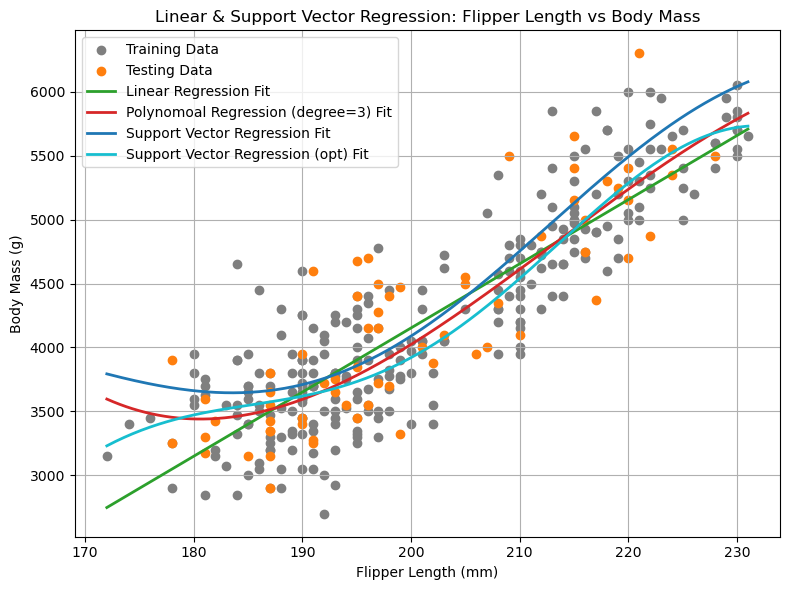

In [30]:
# using predictions from opt parameters to plot regression curve

y_range_svr_opt_scaled = svr_opt_model.predict(X_range_scaled).flatten()
y_range_svr_opt = scaler_y.inverse_transform(y_range_svr_opt_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_poly3, color='tab:red', linewidth=2, label=f"Polynomoal Regression (degree={degree3}) Fit")
plt.plot(X_range, y_range_svr, color='tab:blue', linewidth=2, label="Support Vector Regression Fit")
plt.plot(X_range, y_range_svr_opt, color='tab:cyan', linewidth=2, label="Support Vector Regression (opt) Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear & Support Vector Regression: Flipper Length vs Body Mass")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-poly3-svr.png")

### 4.5 Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt3_model = DecisionTreeRegressor(max_depth=3, random_state=123)
dt3_model.fit(X_train_scaled, y_train_scaled)

y_pred_dt3_scaled = dt3_model.predict(X_test_scaled)
y_pred_dt3 = scaler_y.inverse_transform(y_pred_dt3_scaled.reshape(-1, 1)).ravel()

rmse_dt3 = root_mean_squared_error(y_test_orig, y_pred_dt3)
r2_value_dt3 = r2_score(y_test_orig, y_pred_dt3)
print(f"Decision Tree (depth=3) RMSE: {rmse_dt3:.2f}, R²: {r2_value_dt3:.2f}")

Decision Tree (depth=3) RMSE: 415.62, R²: 0.72


In [32]:
dt5_model = DecisionTreeRegressor(max_depth=5, random_state=123)
dt5_model.fit(X_train_scaled, y_train_scaled)

y_pred_dt5_scaled = dt5_model.predict(X_test_scaled)
y_pred_dt5 = scaler_y.inverse_transform(y_pred_dt5_scaled.reshape(-1, 1)).ravel()

rmse_dt5 = root_mean_squared_error(y_test_orig, y_pred_dt5)
r2_value_dt5 = r2_score(y_test_orig, y_pred_dt5)
print(f"Decision Tree (depth=5) RMSE: {rmse_dt5:.2f}, R²: {r2_value_dt5:.2f}")

Decision Tree (depth=5) RMSE: 424.83, R²: 0.70


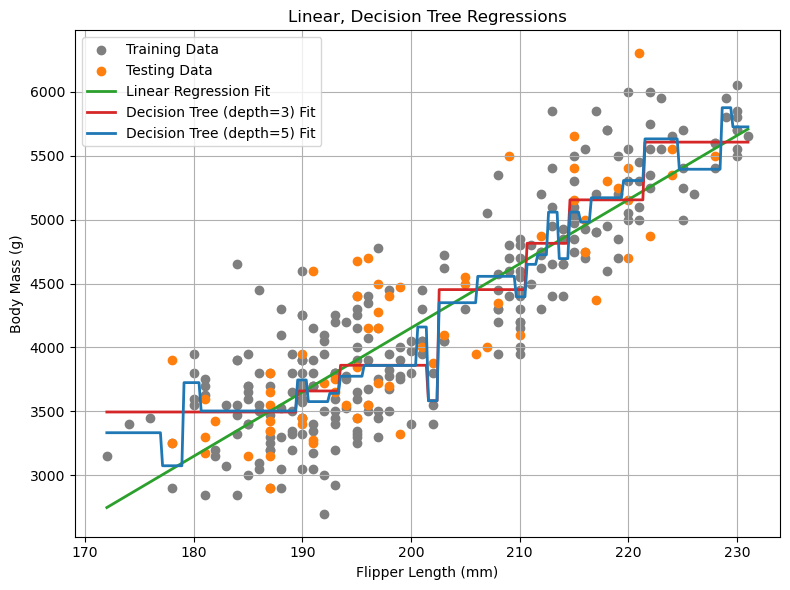

In [33]:
# using all predictions to plot regression curve

y_range_dt3_scaled = dt3_model.predict(X_range_scaled).flatten()
y_range_dt3 = scaler_y.inverse_transform(y_range_dt3_scaled.reshape(-1, 1)).ravel()

y_range_dt5_scaled = dt5_model.predict(X_range_scaled).flatten()
y_range_dt5 = scaler_y.inverse_transform(y_range_dt5_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_dt3, color='tab:red',  linewidth=2, label="Decision Tree (depth=3) Fit")
plt.plot(X_range, y_range_dt5, color='tab:blue', linewidth=2, label="Decision Tree (depth=5) Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear, Decision Tree Regressions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-decision-tree-35.png")

#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf5_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=123)
rf5_model.fit(X_train_scaled, y_train_scaled)

y_pred_rf5_scaled = rf5_model.predict(X_test_scaled)
y_pred_rf5 = scaler_y.inverse_transform(y_pred_rf5_scaled.reshape(-1, 1)).ravel()

rmse_rf5 = root_mean_squared_error(y_test_orig, y_pred_rf5)
r2_value_rf5 = r2_score(y_test_orig, y_pred_rf5)
print(f"Random Forest (depth=5) RMSE: {rmse_rf5:.2f}, R²: {r2_value_rf5:.2f}")

Random Forest (depth=5) RMSE: 425.48, R²: 0.70


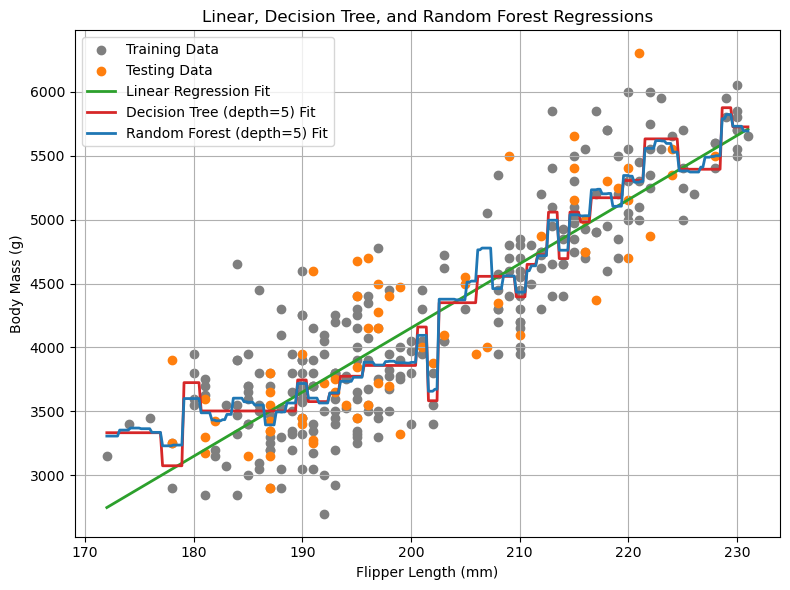

In [35]:
# using all predictions to plot regression curve

y_range_rf5_scaled = rf5_model.predict(X_range_scaled).flatten()
y_range_rf5 = scaler_y.inverse_transform(y_range_rf5_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_dt5, color='tab:red', linewidth=2, label="Decision Tree (depth=5) Fit")
plt.plot(X_range, y_range_rf5, color='tab:blue', linewidth=2, label="Random Forest (depth=5) Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear, Decision Tree, and Random Forest Regressions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-dt5-rf5.png")

#### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb5_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=123)
gb5_model.fit(X_train_scaled, y_train_scaled)

y_pred_gb5_scaled = gb5_model.predict(X_test_scaled)
y_pred_gb5 = scaler_y.inverse_transform(y_pred_gb5_scaled.reshape(-1, 1)).ravel()

rmse_gb5 = root_mean_squared_error(y_test_orig, y_pred_gb5)
r2_value_gb5 = r2_score(y_test_orig, y_pred_gb5)
print(f"Gradient Boosting (depth=5) RMSE: {rmse_gb5:.2f}, R²: {r2_value_gb5:.2f}")

Gradient Boosting (depth=5) RMSE: 441.01, R²: 0.68


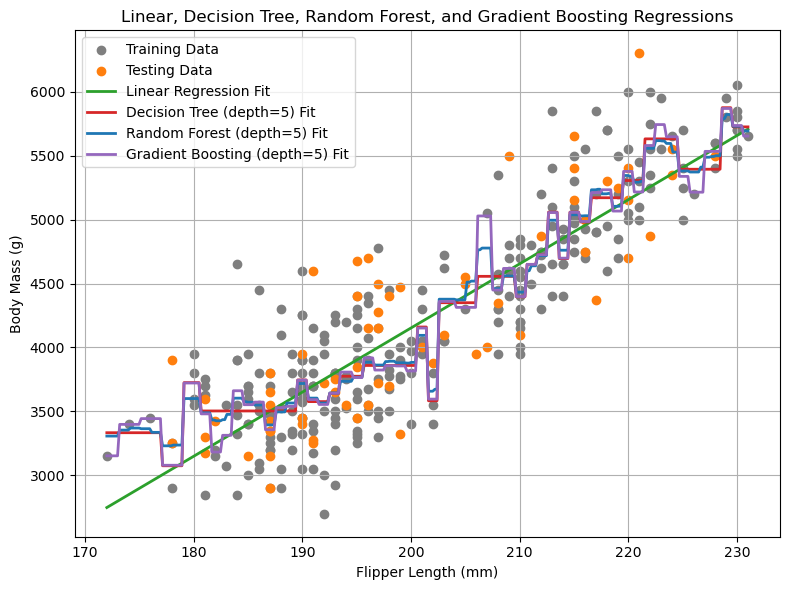

In [37]:
# using all predictions to plot regression curve

y_range_gb5_scaled = gb5_model.predict(X_range_scaled).flatten()
y_range_gb5 = scaler_y.inverse_transform(y_range_gb5_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_dt5, color='tab:red', linewidth=2, label="Decision Tree (depth=5) Fit")
plt.plot(X_range, y_range_rf5, color='tab:blue', linewidth=2, label="Random Forest (depth=5) Fit")
plt.plot(X_range, y_range_gb5, color='tab:purple', linewidth=2, label="Gradient Boosting (depth=5) Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear, Decision Tree, Random Forest, and Gradient Boosting Regressions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-dt5-rf5-gb5.png")

In [38]:
print("\nComparison of RMSE and R² values:")
print(f"Linear Regression           RMSE: {rmse_linear:.2f}, R²: {r2_value_linear:.2f}")
print(f"Decision Tree     (depth=5) RMSE: {rmse_dt5:.2f}, R²: {r2_value_dt5:.2f}")
print(f"Random Forest     (depth=5) RMSE: {rmse_rf5:.2f}, R²: {r2_value_rf5:.2f}")
print(f"Gradient Boosting (depth=5) RMSE: {rmse_gb5:.2f}, R²: {r2_value_gb5:.2f}")


Comparison of RMSE and R² values:
Linear Regression           RMSE: 411.85, R²: 0.72
Decision Tree     (depth=5) RMSE: 424.83, R²: 0.70
Random Forest     (depth=5) RMSE: 425.48, R²: 0.70
Gradient Boosting (depth=5) RMSE: 441.01, R²: 0.68


### 4.6 Multi-Layer Perceptron (Scikit-Learn)

In [39]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(32, 16, 8), activation='relu', 
                         solver='adam', max_iter=5000, random_state=123)
mlp_model.fit(X_train_scaled, y_train_scaled)

y_pred_mlp_scaled = mlp_model.predict(X_test_scaled)
y_pred_mlp = scaler_y.inverse_transform(y_pred_mlp_scaled.reshape(-1, 1)).ravel()

rmse_mlp = root_mean_squared_error(y_test_orig, y_pred_mlp)
r2_value_mlp = r2_score(y_test_orig, y_pred_mlp)
print(f"Multi-Layer Perceptron RMSE: {rmse_mlp:.2f}, R²: {r2_value_mlp:.2f}")

Multi-Layer Perceptron RMSE: 416.78, R²: 0.71


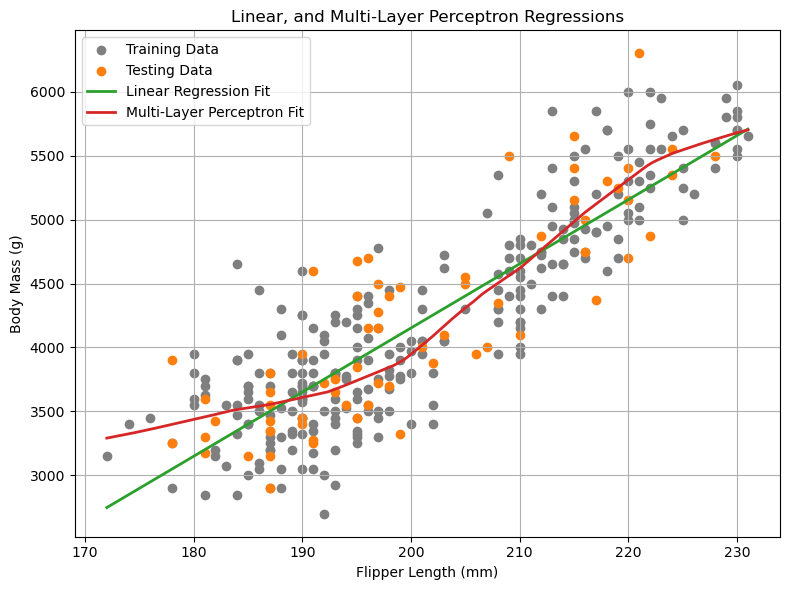

In [40]:
# using all predictions to plot regression curve

y_range_mlp_scaled = mlp_model.predict(X_range_scaled).flatten()
y_range_mlp = scaler_y.inverse_transform(y_range_mlp_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_mlp, color='tab:red', linewidth=2, label="Multi-Layer Perceptron Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear, and Multi-Layer Perceptron Regressions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-mlp.png")

#### Deep Neural Network (Keras)

In [41]:
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(1,))
x = keras.layers.Dense(32, activation='relu')(inputs)
x = keras.layers.Dense(16, activation='relu')(x)
x = keras.layers.Dense(8, activation='relu')(x)
outputs = keras.layers.Dense(1)(x)

dnn_keras_model = keras.Model(inputs=inputs, outputs=outputs)
dnn_keras_model.compile(optimizer='adam', loss='mse')

history = dnn_keras_model.fit(X_train_scaled, y_train_scaled, epochs=200,
                              batch_size=8, verbose=1, validation_split=0.2)

y_pred_dnn_keras_scaled = dnn_keras_model.predict(X_test_scaled)
y_pred_dnn_keras = scaler_y.inverse_transform(y_pred_dnn_keras_scaled.reshape(-1, 1)).ravel()

rmse_dnn_keras = root_mean_squared_error(y_test_orig, y_pred_dnn_keras)
r2_value_dnn_keras = r2_score(y_test_orig, y_pred_dnn_keras)
print(f"Deep Neural Network (Keras) RMSE: {rmse_dnn_keras:.2f}, R²: {r2_value_dnn_keras:.2f}")

Epoch 1/200
27/27 [==============================] - 1s 7ms/step - loss: 0.8408 - val_loss: 0.7639
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 0.6215 - val_loss: 0.6462
Epoch 3/200
27/27 [==============================] - 0s 1ms/step - loss: 0.4980 - val_loss: 0.5959
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 0.4518 - val_loss: 0.5711
Epoch 5/200
27/27 [==============================] - 0s 1ms/step - loss: 0.4300 - val_loss: 0.5416
Epoch 6/200
27/27 [==============================] - 0s 1ms/step - loss: 0.4123 - val_loss: 0.5179
Epoch 7/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3960 - val_loss: 0.4950
Epoch 8/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3843 - val_loss: 0.4745
Epoch 9/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3701 - val_loss: 0.4572
Epoch 10/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3574 - val_loss: 0.4399
Epoch 11/

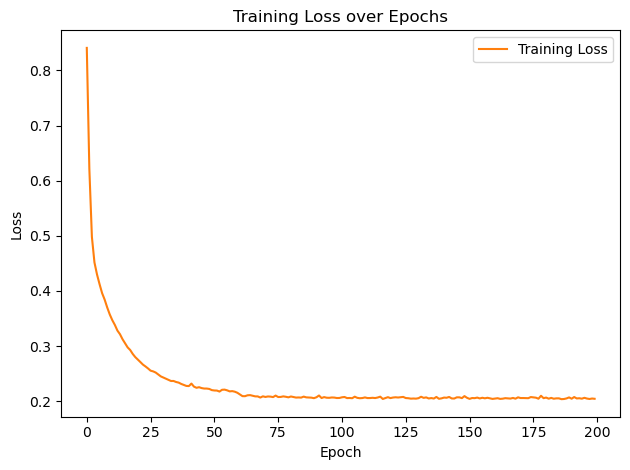

In [42]:
sns.lineplot(x=history.epoch, y=history.history['loss'], c="tab:orange", label='Training Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.tight_layout()
# plt.show()
# plt.savefig("./4-dnn-loss")

10/10 [==============================] - 0s 776us/step


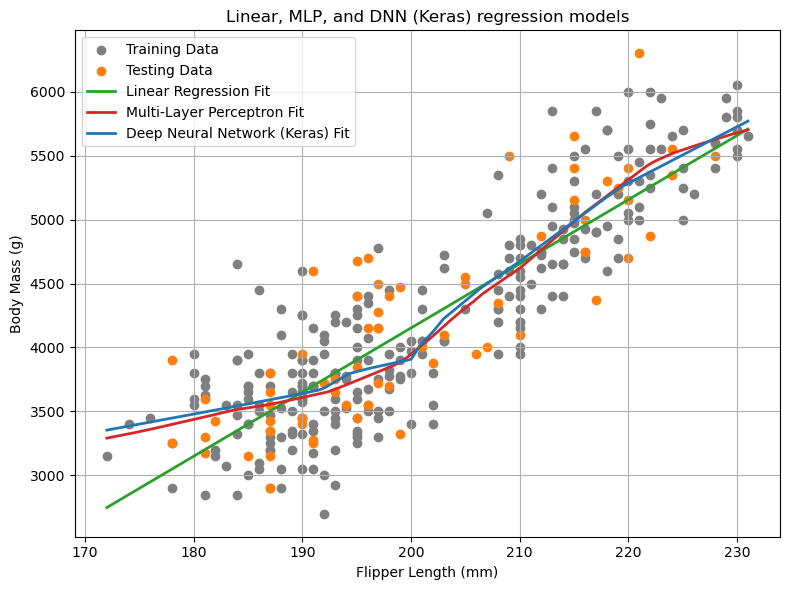

In [43]:
# using all predictions to plot regression curve

y_range_dnn_keras_scaled = dnn_keras_model.predict(X_range_scaled).flatten()
y_range_dnn_keras = scaler_y.inverse_transform(y_range_dnn_keras_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression Fit")
plt.plot(X_range, y_range_mlp, color='tab:red', linewidth=2, label="Multi-Layer Perceptron Fit")
plt.plot(X_range, y_range_dnn_keras, color='tab:blue', linewidth=2, label="Deep Neural Network (Keras) Fit")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear, MLP, and DNN (Keras) regression models")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./5-regression-predictive-curve-linear-mlp-keras.png")

#### Deep Neural Network (PyTorch)

In [44]:
import torch
import torch.nn as nn

In [45]:
X = penguins_regression[["flipper_length_mm"]].values.astype(np.float32)
y = penguins_regression["body_mass_g"].values.astype(np.float32).reshape(-1, 1)

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=123)

# convert to torch tensors
X_train_t = torch.tensor(X_train)
y_train_t = torch.tensor(y_train)
X_test_t = torch.tensor(X_test)
y_test_t = torch.tensor(y_test)

In [46]:
# define a DNN model using PyTorch

class DNNRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    def forward(self, x):
        return self.net(x)

dnn_pytorch_model = DNNRegressor()

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(dnn_pytorch_model.parameters(), lr=0.001)

In [47]:
# training loop

epochs = 1000
for epoch in range(epochs):
    dnn_pytorch_model.train()
    optimizer.zero_grad()
    outputs = dnn_pytorch_model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.3742
Epoch 200/1000, Loss: 0.2037
Epoch 300/1000, Loss: 0.2023
Epoch 400/1000, Loss: 0.2016
Epoch 500/1000, Loss: 0.2012
Epoch 600/1000, Loss: 0.2010
Epoch 700/1000, Loss: 0.2006
Epoch 800/1000, Loss: 0.2001
Epoch 900/1000, Loss: 0.2000
Epoch 1000/1000, Loss: 0.1998


In [48]:
# evaluation

dnn_pytorch_model.eval()
with torch.no_grad():
    y_pred_t = dnn_pytorch_model(X_test_t).numpy()
y_pred_dnn_pytorch = scaler_y.inverse_transform(y_pred_t)

# y_test_orig = scaler_y.inverse_transform(y_test)

rmse_dnn_pytorch = root_mean_squared_error(y_test_orig, y_pred_dnn_pytorch)
r2_value_dnn_pytorch = r2_score(y_test_orig, y_pred_dnn_pytorch)
print(f"Deep Neural Network (PyTorch) RMSE: {rmse_dnn_pytorch:.2f}, R²: {r2_value_dnn_pytorch:.2f}")

Deep Neural Network (PyTorch) RMSE: 412.30, R²: 0.72


10/10 [==============================] - 0s 665us/step


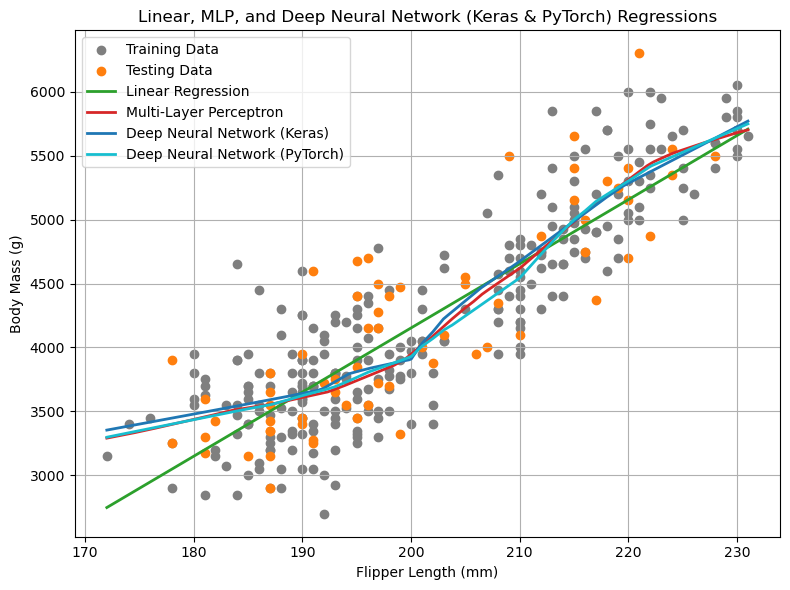

In [49]:
# using all predictions to plot regression curve

y_range_dnn_keras_scaled = dnn_keras_model.predict(X_range_scaled).flatten()
y_range_dnn_keras = scaler_y.inverse_transform(y_range_dnn_keras_scaled.reshape(-1, 1)).ravel()

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1).astype(np.float32)
X_range_scaled = scaler_X.transform(X_range)
X_range_t = torch.tensor(X_range_scaled)

with torch.no_grad():
    y_range_dnn_pytorch_scaled = dnn_pytorch_model(X_range_t).numpy()
y_range_dnn_pytorch = scaler_y.inverse_transform(y_range_dnn_pytorch_scaled.reshape(-1, 1)).ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X_train_orig, y_train_orig, color="tab:gray", label="Training Data", alpha=1.0)
plt.scatter(X_test_orig, y_test_orig, color="tab:orange", label="Testing Data", alpha=1.0)

plt.plot(X_range, y_range_linear, color='tab:green', linewidth=2, label="Linear Regression")
plt.plot(X_range, y_range_mlp, color='tab:red', linewidth=2, label="Multi-Layer Perceptron")
plt.plot(X_range, y_range_dnn_keras, color='tab:blue', linewidth=2, label="Deep Neural Network (Keras)")
plt.plot(X_range, y_range_dnn_pytorch, color='tab:cyan', linewidth=2, label="Deep Neural Network (PyTorch)")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear, MLP, and Deep Neural Network (Keras & PyTorch) Regressions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("./6-regression-predictive-curve-linear-mlp-keras-pytorch.png")

## 5. Comparison of Trained Models

In [50]:
print("\nComparison of RMSE and R² values:")

print(f"K-Nearest Neighbors              RMSE: {rmse_knn:.2f},    R²: {r2_value_knn:.2f}")

print(f"Linear Regression                RMSE: {rmse_linear:.2f},    R²: {r2_value_linear:.2f}")
print(f"Regularized Regression (Ridge)   RMSE: {rmse_ridge:.2f},    R²: {r2_value_ridge:.2f}")
print(f"Regularized Regression (Lasso)   RMSE: {rmse_lasso:.2f},    R²: {r2_value_lasso:.2f}")

print(f"Polynomial Regression (degree=3) RMSE: {rmse_poly3:.2f},    R²: {r2_value_poly3:.2f}")
print(f"Polynomial Regression (degree=5) RMSE: {rmse_poly5:.2f},    R²: {r2_value_poly5:.2f}")

print(f"Support Vector Regression        RMSE: {rmse_svr:.2f},    R²: {r2_value_svr:.2f}")
print(f"Support Vector Regression (OPT)  RMSE: {rmse_svr_opt:.2f},    R²: {r2_value_svr_opt:.2f}")

print(f"Decision Tree (depth=3)          RMSE: {rmse_dt3:.2f},    R²: {r2_value_dt3:.2f}")
print(f"Decision Tree (depth=5)          RMSE: {rmse_dt5:.2f},    R²: {r2_value_dt5:.2f}")
print(f"Random Forest (depth=5)          RMSE: {rmse_rf5:.2f},    R²: {r2_value_rf5:.2f}")
print(f"Gradient Boosting (depth=5)      RMSE: {rmse_gb5:.2f},    R²: {r2_value_gb5:.2f}")

print(f"Multi-Layer Perceptron           RMSE: {rmse_mlp:.2f},    R²: {r2_value_mlp:.2f}")
print(f"Deep Neural Network (Keras)      RMSE: {rmse_dnn_keras:.2f},    R²: {r2_value_dnn_keras:.2f}")
print(f"Deep Neural Network (PyTorch)    RMSE: {rmse_dnn_pytorch:.2f},    R²: {r2_value_dnn_pytorch:.2f}")


Comparison of RMSE and R² values:
K-Nearest Neighbors              RMSE: 444.09,    R²: 0.68
Linear Regression                RMSE: 411.85,    R²: 0.72
Regularized Regression (Ridge)   RMSE: 414.18,    R²: 0.72
Regularized Regression (Lasso)   RMSE: 437.19,    R²: 0.69
Polynomial Regression (degree=3) RMSE: 407.47,    R²: 0.73
Polynomial Regression (degree=5) RMSE: 415.55,    R²: 0.72
Support Vector Regression        RMSE: 433.30,    R²: 0.69
Support Vector Regression (OPT)  RMSE: 421.54,    R²: 0.71
Decision Tree (depth=3)          RMSE: 415.62,    R²: 0.72
Decision Tree (depth=5)          RMSE: 424.83,    R²: 0.70
Random Forest (depth=5)          RMSE: 425.48,    R²: 0.70
Gradient Boosting (depth=5)      RMSE: 441.01,    R²: 0.68
Multi-Layer Perceptron           RMSE: 416.78,    R²: 0.71
Deep Neural Network (Keras)      RMSE: 412.15,    R²: 0.72
Deep Neural Network (PyTorch)    RMSE: 412.30,    R²: 0.72


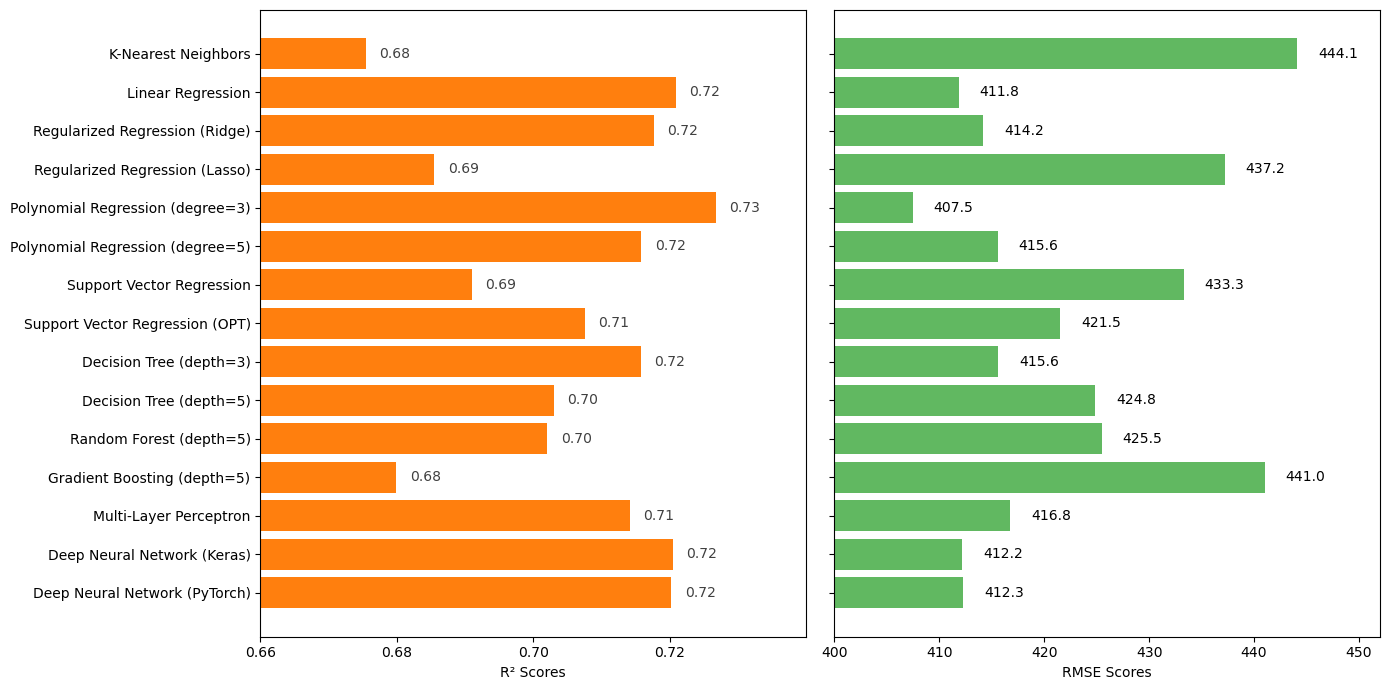

In [51]:
model_names = ["Deep Neural Network (PyTorch)", "Deep Neural Network (Keras)", "Multi-Layer Perceptron",
               "Gradient Boosting (depth=5)", "Random Forest (depth=5)", "Decision Tree (depth=5)", "Decision Tree (depth=3)",
               "Support Vector Regression (OPT)", "Support Vector Regression",
               "Polynomial Regression (degree=5)", "Polynomial Regression (degree=3)",
               "Regularized Regression (Lasso)", "Regularized Regression (Ridge)", "Linear Regression",
               "K-Nearest Neighbors"]
rmse_scores = [rmse_dnn_pytorch, rmse_dnn_keras, rmse_mlp, rmse_gb5, rmse_rf5, rmse_dt5, rmse_dt3,
               rmse_svr_opt, rmse_svr, rmse_poly5, rmse_poly3, rmse_lasso, rmse_ridge, rmse_linear, rmse_knn]
r2_scores = [r2_value_dnn_pytorch, r2_value_dnn_keras, r2_value_mlp, r2_value_gb5, r2_value_rf5,
             r2_value_dt5, r2_value_dt3, r2_value_svr_opt, r2_value_svr, r2_value_poly5, r2_value_poly3,
             r2_value_lasso, r2_value_ridge, r2_value_linear, r2_value_knn]

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# R² scores
axes[0].barh(model_names, r2_scores, color='tab:orange')
axes[0].set_xlabel("R² Scores")
axes[0].set_xlim(0.66, 0.74)
axes[0].set_xticks(np.arange(0.66, 0.74, 0.02))

for i, score in enumerate(r2_scores):
    axes[0].text(score + 0.002, i, f'{score:.2f}', va='center', alpha=0.75)

# RMSE scores
axes[1].barh(model_names, rmse_scores, color='tab:green', alpha=0.75)
axes[1].set_xlabel("RMSE Scores")
axes[1].set_xlim(400, 452)
axes[1].set_xticks(np.arange(400, 452, 10))

for i, score in enumerate(rmse_scores):
    axes[1].text(score + 2, i, f'{score:.1f}', va='center')

plt.tight_layout()
plt.show()
# plt.savefig("./6-rmse-r2-scores_alla.png")